In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

%matplotlib inline
import matplotlib.pyplot as plt

### Reading Data in CSV format.

In [3]:
CRM_Data = pd.read_csv('Copy of HireArt - Data Analyst Exercise 10.12.17.csv')
CRM_Data.head(10)

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25
5,Chauncey Dach,Abbott Group,2016-03-21
6,Chauncey Dach,"Oga, Gottlieb and Cruickshank",2013-10-27
7,Rigoberto White,"Fahey, Wunsch and Bashirian",2016-05-14
8,Rigoberto White,Bosco-Ortiz,2014-07-14
9,Rigoberto White,Ondricka-Wolff,2015-10-14


### Checking if there are any null values. 

In [4]:
CRM_Data.isnull().values.any()

False

### describe() command gives us information regarding the composition of the dataset. 

This Dataset is comprised of 4 unique Account managers, 35 Unique Clients and 704 distinct dates. **Milan Crona** being the most frequent Account Manager name. **Eichmann and Sons** is the most contacted client. 
**2013-10-11** is the most recurring day in the dataset. 

#### We can safely assume that 'October' is the most frequently contacted month in the given dataset. 

In [5]:
CRM_Data.describe()

,Account manager,Client Name,Date of Contact
count,1001,1001,1001
unique,4,35,704
top,Milan Crona,Eichmann and Sons,2013-10-11
freq,286,38,7


####   Splitting  the 'Date of Contact' into day, month and year to extract monthwise and yearwise data.

Since I wanted to split the 'Date of Contact' the 'object' data type can not be split. I first checked the datatypes for all columns and then converted the 'Date of Contact' to 'datetime64' format. 

In [6]:
CRM_Data.dtypes

Account manager    object
Client Name        object
Date of Contact    object
dtype: object

All the three colums are in 'object' type, we have to convert the 'Date of Contact' column to **'datetime64'** format in order to process it.

In [7]:
CRM_Data['Date of Contact']= pd.to_datetime(CRM_Data['Date of Contact'])

In [8]:
CRM_Data.dtypes

Account manager            object
Client Name                object
Date of Contact    datetime64[ns]
dtype: object

I have now converted the column to **datetime64 format**

Now I am splitting the date into three columns namely : Day, Month and Year

In [9]:
CRM_Data['Day'] = CRM_Data['Date of Contact'].dt.day 
CRM_Data['Month'] = CRM_Data['Date of Contact'].dt.month 
CRM_Data['Year'] = CRM_Data['Date of Contact'].dt.year 

In [10]:
CRM_Data.head(5)

,Account manager,Client Name,Date of Contact,Day,Month,Year
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,31,10,2015
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,15,12,2013
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,7,12,2013
3,Milan Crona,Armstrong Group,2013-11-02,2,11,2013
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,25,12,2013


### Converting the columns of the Dataframe again to 'object type' to get information from describe() command.

In [11]:
CRM_Data.loc[0:2] = CRM_Data.astype(object)

In [12]:
CRM_Data.dtypes

Account manager    object
Client Name        object
Date of Contact    object
Day                object
Month              object
Year               object
dtype: object

** Without being in 'object' type, the describe() command will not give required information.**

In [13]:
CRM_Data.describe()

,Account manager,Client Name,Date of Contact,Day,Month,Year
count,1001,1001,1001,1001,1001,1001
unique,4,35,704,31,12,5
top,Milan Crona,Eichmann and Sons,2013-10-11 00:00:00,19,10,2014
freq,286,38,7,44,213,264


#### The data consist of CRM data for 5 Years of data and maximum appearing top year is **2014**.

### Count of Customers contacted per month.

In [14]:
CRM_Data_monthwise= CRM_Data.groupby(['Month'])['Client Name']

In [15]:
CRM_Data_monthwise=CRM_Data_monthwise.count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)

In [16]:
CRM_Data_monthwise

,Month,Number of Clients
9,10,213
8,9,121
7,8,79
5,6,77
11,12,77
4,5,69
6,7,66
10,11,65
1,2,64
0,1,60


### Hence, we can prove that, October is the month when maximum clients were contacted. 213 Clients in total were contacted during this month.

Sometimes, visual representations help us in concluding. As below histogram shows us **October** is the highest month contacted. 

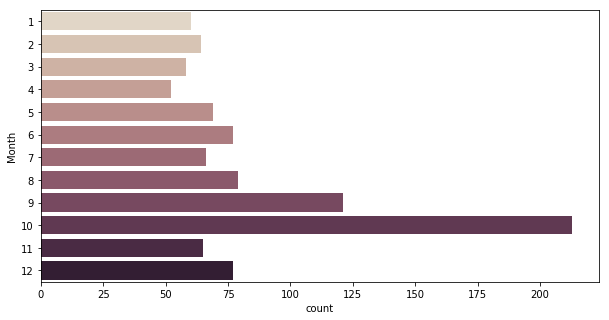

In [17]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Month", data= CRM_Data, palette="ch:.25");

In [18]:
Total_Clients_contacted = CRM_Data_monthwise['Number of Clients'].sum()

In [19]:
df_month = CRM_Data_monthwise.groupby('Month')

In [20]:
Clients= CRM_Data_monthwise['Number of Clients']

In [21]:
percentage = (Clients/Total_Clients_contacted) * 100
print(percentage)

9     21.278721
8     12.087912
7      7.892108
5      7.692308
11     7.692308
4      6.893107
6      6.593407
10     6.493506
1      6.393606
0      5.994006
2      5.794206
3      5.194805
Name: Number of Clients, dtype: float64


### Total 21% of the customers were contacted during the month of October

In [22]:
df_month_year = CRM_Data.groupby(['Month','Year'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month_year

,Month,Year,Number of Clients
36,10,2013,60
37,10,2014,58
38,10,2015,53
39,10,2016,42
32,9,2014,33
35,9,2017,31
33,9,2015,29
34,9,2016,28
28,8,2014,25
20,6,2014,23


In [23]:
month_year=CRM_Data.groupby(['Month','Year','Client Name'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
month_year

,Month,Year,Client Name,Number of Clients
588,10,2015,"Wyman, Farrell and Haag",7
507,10,2013,Donnelly-Champlin,6
540,10,2014,Eichmann and Sons,5
538,10,2014,"Denesik, Stehr and Carter",5
519,10,2013,"Kuhic, Stark and Kreiger",4
561,10,2015,Abbott Group,4
525,10,2013,Ondricka-Wolff,4
504,10,2013,"Brown, Wyman and Grimes",4
463,9,2016,"Anderson, Kutch and Hyatt",4
600,10,2016,"Hermiston, Armstrong and Balistreri",4


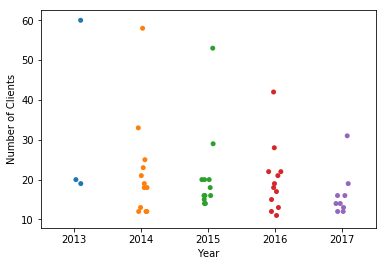

In [24]:
sns.stripplot(x="Year", y="Number of Clients", data=df_month_year);

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


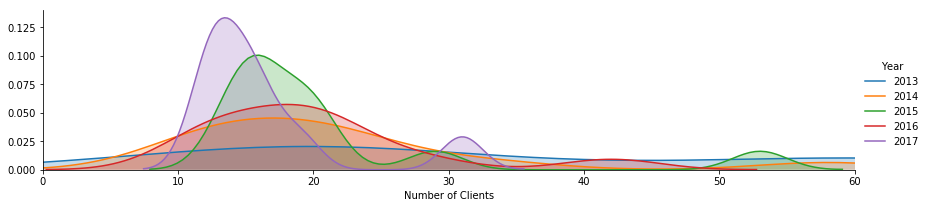

In [25]:
facet = sns.FacetGrid(df_month_year, hue="Year",aspect=4);
facet.map(sns.kdeplot,'Number of Clients',shade= True);
facet.set(xlim=(0, df_month_year['Number of Clients'].max()));
facet.add_legend();

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


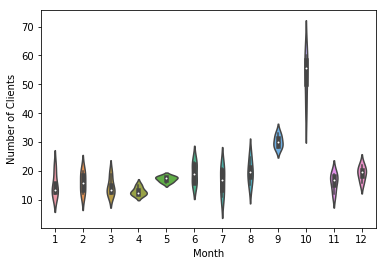

In [26]:
sns.violinplot(x="Month", y="Number of Clients", data=df_month_year);

### All the above visualizations emphasize on same conclusion that, Over the period of 4 years, Ovober is the month when marketing team can focus on announcements for new products as this month has the highest client reach.